In [1]:
import pandas as pd
from typing import Tuple
import lxml.html
import re

df_header = pd.read_csv('data/2018-07-15-content.csv')
df_header.head(2)

,Unnamed: 0,id,text,code-frame,lang,code,a-text,a-href
0,0,1a7920d0dbc2099db000,はじめには、モックのサービスを作成して、実際にシナリオテストを実施してみました。今回は、テス...,Scenario: Normal def\n\n* def text = 'karate e...,"cucumber,cucumber,cucumber,cucumber,cucumber,c...","def,print,match,"""""",jsonData,set,table,set,tab...","前回（#03 Writing Scenarios）,https://github.com/i...","#%E3%81%AF%E3%81%98%E3%82%81%E3%81%AB,https://..."
1,1,5414e0beb7df9908949d,久々のQiita投稿です。淫夢記事しか投稿してないのはまずいかなと思ってまともな記事を1つシ...,\n# # notepadの位置を確認\n$ which notepad.exe\n/mnt...,"sh,sh",NaN,WSLのbashからWindowsの実行ファイルを実行する | yuipro,https://yuis-programming.com/2018/06/19/wsl%e3...


In [2]:
df_header.isna().sum()

Unnamed: 0       0
id               0
text            16
code-frame     850
lang           856
code          2122
a-text         979
a-href         233
dtype: int64

In [3]:
df_nonna = df_header[df_header['text'].isna() == False]
df_nonna.isna().sum()

Unnamed: 0       0
id               0
text             0
code-frame     845
lang           851
code          2106
a-text         969
a-href         226
dtype: int64

In [4]:
import MeCab
tagger = MeCab.Tagger()
tagger.parse('')

node = tagger.parseToNode(df_header['text'][0])

In [5]:
hinshi_list = ['名詞','動詞','形容詞']
words = []
woo = []
while node:
    pos, pos_sub1 = node.feature.split(',')[:2]
#     print(pos, pos_sub1)
    if pos in hinshi_list:
        woo.append(node.surface)
    if pos == '名詞' and pos_sub1 in ('固有名詞', '一般'):
        words.append(node.surface)

#     print(node.surface, node.feature)
    node = node.next

In [8]:
len(words)

116

In [9]:
len(woo)

401

In [10]:
hinshi_list = ['名詞','動詞','形容詞']

def get_words(content):
    node = tagger.parseToNode(content)
    words = []
    woo = []
    while node:
        pos, pos_sub1 = node.feature.split(',')[:2]
    #     print(pos, pos_sub1)
        if pos in hinshi_list:
            woo.append(node.surface)
        if pos == '名詞' and pos_sub1 in ('固有名詞', '一般'):
            words.append(node.surface)

#         print(node.surface, node.feature)
        node = node.next
    return words
    return woo
    

In [11]:
import numpy as np
df_header['text'][19] == np.nan
df_header['text'][19]


nan

In [126]:
df_header['text'][19].isnull()

AttributeError: 'float' object has no attribute 'isnull'

In [12]:
from collections import Counter

frequency = Counter()
num_docs = 0

for content in df_nonna['text'][:200]:
#     print(num_docs)
#     if np.isnan(df_header['text'][19]) == False:
    words = get_words(content)
    frequency.update(words)
#     print(num_docs)
    num_docs +=1
    
    

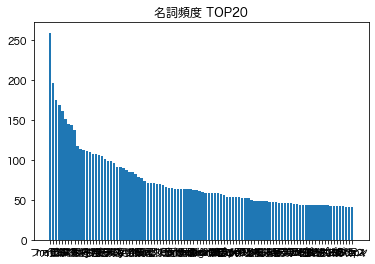

In [15]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# TOP20のグラフ           
x = range(100)
mc = frequency.most_common(100)              # 頻度TOP20を抽出
ch = [ch[0] for ch in mc]           # ひらがなのリスト
f = np.array([ch[1] for ch in mc])  # 頻度の数値のリスト




plt.bar(x, f) 
plt.xticks(x, ch)  #日本語表示はfontproperties=fp
plt.title("名詞頻度 TOP20")
plt.show()

In [17]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import MeCab as mc

In [18]:
def mecab_analysis(text):
#     t = mc.Tagger('-Ochasen -d /usr/local/Cellar/mecab/0.996/lib/mecab/dic/mecab-ipadic-neologd/')
    t = MeCab.Tagger()
#     enc_text = text.encode('utf-8') 
    node = t.parseToNode(text) 
    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ["形容詞", "動詞","名詞", "副詞"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [19]:
def get_wordlist_from_QiitaURL(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text)
    text = soup.body.section.get_text().replace('\n','').replace('\t','')
    return mecab_analysis(text)

In [20]:
def create_wordcloud(text):

    # 環境に合わせてフォントのパスを指定する。
    fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"
#     fpath = "/Library/Fonts/ヒラギノ角ゴ Pro W3.otf"
#     fpath = "/Library/Fonts/Menlo for Powerline.ttf"

    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(text)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

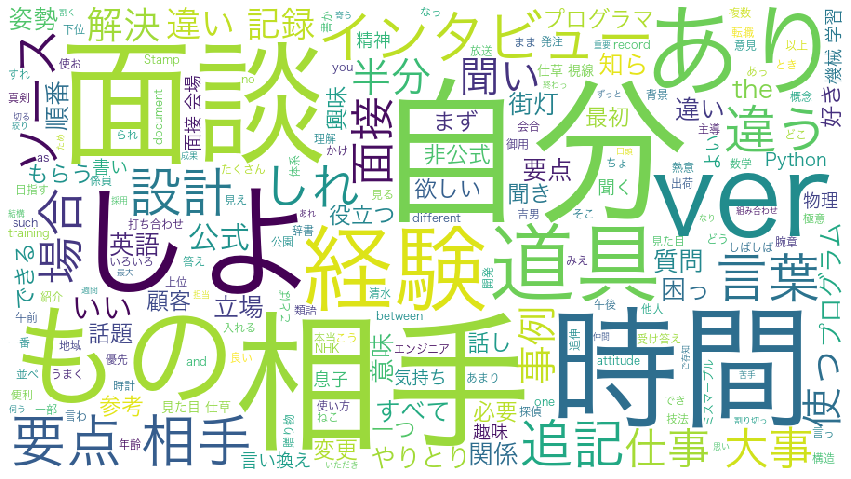

In [21]:
wordlist = mecab_analysis(df_header['text'][6])
# print(wordlist) 
create_wordcloud(" ".join(wordlist))

In [22]:
df_header['text'][0]

'はじめには、モックのサービスを作成して、実際にシナリオテストを実施してみました。今回は、テストの幅を広げるために、Karateで、どのようにデータの定義をするのかを確認してみます。テスト実施時に、リクエストの内容を指定したり、レスポンスの内容を確認したりするために、どのようにデータを定義するのか、ということになります。データの指定方法変数の指定まずは、基本的な定義として、変数での指定をしてみます。が、変数の定義です。 は、テスト実行時に、レポートに変数の内容を出力してくれます。 は、値の確認です。実行したときのレポートの内容は、以下のような感じです。問題なく、テストが通っていますね。当然ながら、日本語も問題なく利用できます。JSON形式のデータの指定次は、JSONデータの指定方法について確認します。REST-APIのテストに向けては、この辺りの使い勝手は重要ですね。基本的な指定の仕方として、マルチラインでの指定です。 で囲むことによって、マルチラインでのデータの指定ができています。先程指定した  のデータの一部を変更しています。コマンドを利用することで、データを変更できます。今度は、テーブル形式でのJSONデータの指定です。 コマンドを指定して定義しています。生のJSONデータよりも、こちらの方が見やすいですね。ただ、tableの場合、ネストされているようなJSONは定義できません。ネストされたJSONデータを定義したい場合は、コマンドを利用することで可能です。こちらも、テーブル形式に近い内容ですが、のときと比べて、行と列の指定が入れ替わっていることに注意してください。テストの実行結果は、以下のようになります。指定したデータの内容も確認できて、分かりやすいです。パラメータの置換上記で、コマンドを利用した変数の値の変換を実施しましたが、指定した変数の一部を置き換えるようなこと（例えば、文字列の一部分を変更した場合など）はできません。そのような置換としては、別の方法があります。コマンドを利用すると、予め置換変数を指定しておき、それを指定した値で置換するようなことが可能です。デフォルトの変数は、 という形式です。この場合、` のようなかたちで、変数の一部を置換できます。置換パラメータは、形式をカスタマイズすることも可能です。 のように定義して、置換することも可能です。こ